In [46]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt


from conductive_loads import *


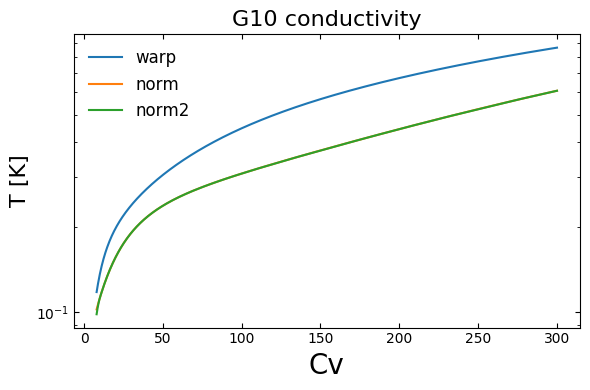

In [45]:
T = np.linspace(8, 300,1000)

fig, ax = plt.subplots(figsize=(6,4), dpi=100)

plt.plot(T, g10warpk(T), label='warp')
plt.plot(T, g10normk(T), label='norm')
plt.plot(T, np.interp(T, T_G10, k_G10), label='norm2')

# plt.xlim([0,8])
# plt.ylim([1e-7,1e-3])

# plt.xscale('log')
plt.yscale('log')


plt.xlabel(r'Cv', size=20)
plt.ylabel(r'T [K]', size=16)

plt.title(r'G10 conductivity', size=16)


plt.legend(loc='best', frameon=False, fontsize=12)

plt.tick_params(which='both', direction='in', right=True, top=True)

plt.tight_layout()

# plt.savefig('test.png'%e, dpi = 200)
plt.show()

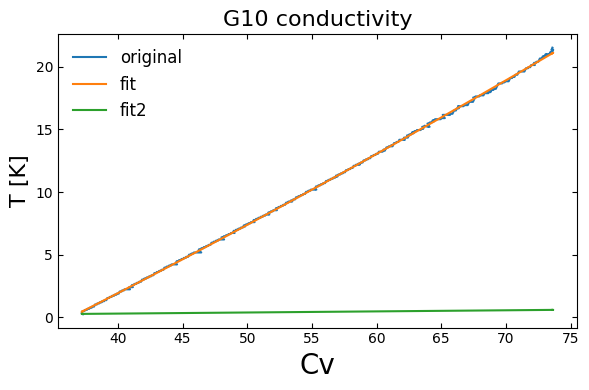

In [59]:
T, lift = np.loadtxt('./cryoCooler/cryotel_GT_23C.txt', unpack = True, delimiter = ',')
p = np.polyfit(T, lift, 2) #fitting a line for now since the cooling curve is close

lowT = np.array([20, 30, 40])
lowlift = np.array([0.124, 0.223, 0.3])
p_low = np.polyfit(lowT, lowlift, 1) #linear fit to lower temp data from AKARI

# icsCryocooler = np.max([np.polyval(p, T_VCS1), np.polyval(p_low, T_VCS1)])
# ocsCryocooler = np.max([np.polyval(p, T_VCS2), np.polyval(p_low, T_VCS2)])


fig, ax = plt.subplots(figsize=(6,4), dpi=100)

plt.plot(T, lift, label='original')
plt.plot(T, np.polyval(p, T), label='fit')
plt.plot(T, np.polyval(p_low, T), label='fit2')

# plt.xlim([0,8])
# plt.ylim([1e-7,1e-3])

# plt.xscale('log')
# plt.yscale('log')


plt.xlabel(r'Cv', size=20)
plt.ylabel(r'T [K]', size=16)

plt.title(r'G10 conductivity', size=16)


plt.legend(loc='best', frameon=False, fontsize=12)

plt.tick_params(which='both', direction='in', right=True, top=True)

plt.tight_layout()

# plt.savefig('test.png'%e, dpi = 200)
plt.show()

In [70]:
T_CF, k_CF = np.loadtxt('./thermalProp/CF_cv.txt', unpack = True)

np.savetxt('CF_cv.txt', np.vstack((T_CF, 1e-3*k_CF)).T, fmt='%.3e')

In [9]:
T_VCS1, T_VCS2 = 40.,100.
VCS1, VCS2 = 1.,2.

B = np.array([[1,.5],[.5,1]])

X = np.array([T_VCS1, T_VCS2]).reshape(2,1) 
Fx = np.array([VCS1, VCS2]).reshape(2,1)
S = np.linalg.solve(B,Fx)
X += S

print(X)
print(S)

[[ 40.]
 [102.]]
[[0.]
 [2.]]
